## 🧠 Welcome to the *Exploring Mental Health Data* Notebook!

> Welcome to our Kaggle notebook for the **Exploring Mental Health Data** competition! In this notebook, we aim to explore, analyze, and model data from a synthetic mental health survey to identify factors associated with depression. This competition is part of Kaggle's **2024 Playground Series**, designed to challenge and enhance our machine learning skills. Let’s dive in and uncover insights from the data!

---



# 🏆 Kaggle Notebook: Mental Health Analysis and Prediction 🧠

## 📋 Table of Contents
1. **📦 Libraries and Setup**  
   * Importing all the required libraries and setting up the environment.
2. **🛠️ Data Loading and Initial Analysis**  
   * Loading the training and test datasets.  
   * Performing basic checks for missing and duplicate values.
3. **🔧 Preprocessing Pipeline**  
   * Custom transformers and pipeline construction for feature engineering and cleaning.
4. **🚂 Model Training with Stratified Cross-Validation**  
   * Training models with **stratified cross-validation** for reliable evaluation.
5. **🎯 Best Model Selection and Performance**  
   * Identifying the best model based on cross-validation accuracy.  
   * Evaluating the model on the training dataset.
6. **📤 Saving Predictions**  
   * Exporting predictions for the best model and all other models.  
   * Saving results to CSV files.
7. **📊 Predicted Probability Visualization**  
   * Visualizing the distribution of predicted probabilities for the test set.
8. **🎉 Conclusions and Next Steps**  
   * Summarizing key findings and outlining potential improvements.






---

## 🎯 Introduction

### Competition Goal 🏁
The goal of this competition is to explore mental health survey data and identify key factors associated with depression. By analyzing various features, we aim to make predictions that can accurately indicate the presence of depression.

### Key Deliverables 📋
We will produce predictions for each entry in the test set, aiming to achieve high accuracy in identifying individuals who may experience depression.

### Evaluation Metric 🎯
Submissions are evaluated using the **Accuracy Score**, meaning our predictions will be judged based on the proportion of correct classifications.

### Approach Outline 🧩
Our approach to the competition will include the following steps:
1. **Data Exploration and Visualization**: Gain initial insights into the dataset.
2. **Feature Engineering**: Create and select meaningful features.
3. **Model Training and Tuning**: Build, evaluate, and tune models.
4. **Submission Preparation**: Prepare final predictions for submission.


## Note: We use Optuna for finding best hyperparameter for that we use another notebook and we are only pasting best hyperparameter here. Best Model is Catboost with default hyperparameter


# 🗂️ Data Overview

# 1. Import Required Libraries 📦

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score



warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
train =pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


# 📊 Dataset Overview: Understanding Depression Risk Factors among Adults

### 📝 Dataset Context
>  The following table describes each feature in the dataset and its relevance.

---

### 📌 **Feature Descriptions**

| **Feature**                                               | **Description**                                                                                     |
|-----------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **👤 Name**                                               | Participant's name.                                                                                 |
| **🚻 Gender**                                             | Participant's gender (Male/Female).                                                                 |
| **🎂 Age**                                                | Participant's age (18-60).                                                                          |
| **🏙️ City**                                               | Participant's city of residence.                                                                    |
| **👔 Working Professional or Student**                    | Indicates whether the participant is a working professional or a student.                           |
| **💼 Profession**                                         | Participant's current profession.                                                                   |
| **📚 Academic Pressure**                                  | Level of academic workload, rated on a scale from 1 to 5.                                           |
| **📈 Work Pressure**                                      | Level of work-related workload, rated on a scale from 1 to 5.                                       |
| **🎓 CGPA**                                               | Cumulative Grade Point Average.                                                                     |
| **📖 Study Satisfaction**                                 | Satisfaction level with studies, rated on a scale from 1 to 5.                                      |
| **💼 Job Satisfaction**                                   | Satisfaction level with job, rated on a scale from 1 to 5.                                          |
| **🛏️ Sleep Duration**                                    | Average hours of sleep per night.                                                                   |
| **🍲 Dietary Habits**                                     | Information about participant’s eating habits.                                                      |
| **🎓 Degree**                                             | Highest degree or qualification obtained by the participant.                                        |
| **🧠 Have you ever had suicidal thoughts?**               | Indicates if the participant has had suicidal thoughts (Yes/No).                                    |
| **⏰ Work/Study Hours**                                   | Average daily hours spent on work or study.                                                         |
| **💵 Financial Stress**                                   | Level of financial stress, rated on a scale from 1 to 5.                                            |
| **👪 Family History of Mental Illness**                   | Indicates if there is a family history of mental illness (Yes/No).                                  |
| **🩺 Depression**                                         | Represents whether the participant is at risk of depression (Yes/No), based on lifestyle and demographic factors. |

---

Each feature is essential for understanding various lifestyle and environmental factors that may influence depression risk. The dataset could be used in predictive modeling, trend analysis, and further research on mental health and wellness interventions.


# 2. 🛠️ Data Loading
### Let's load the training and testing datasets and perform some basic checks.


In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")

print("Checking if there are any null values:\n", train.isnull().sum())
print("\nChecking if there are any duplicate rows: ", train.duplicated().sum())

train.info()

# Extracting important column types
target_column = 'Depression'
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(exclude=['object']).columns.drop(target_column)

print("\n🔍 Column Types:")
print("Target Column:", target_column)
print("Categorical Columns:", categorical_columns.tolist())
print("Numerical Columns:", numerical_columns.tolist())


Checking if there are any null values:
 id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0


# 3. Pipeline Construction 🔧
## 🛠️ Data Cleaning 
## ⚙️ Feature Engineering 
## 🔧 Custom Transformer Classes
### Building reusable classes for preprocessing.


In [4]:
test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")

class AddOverallColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X['Overall Pressure'] = X['Academic Pressure'].combine_first(X['Work Pressure'])
        X['Overall Satisfaction'] = X['Study Satisfaction'].combine_first(X['Job Satisfaction'])
        return X

class CreateRoleColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X['Role'] = X.apply(lambda row: row['Profession'] if row['Working Professional or Student'] == 'Working Professional' and pd.notnull(row['Profession']) 
                            else ('Working Professional' if row['Working Professional or Student'] == 'Working Professional' else 'Student'), axis=1)
        return X

class DropUnnecessaryColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X.drop(columns=['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Working Professional or Student', 'Profession'], inplace=True)
        return X

class BinaryConversion(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X['Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})
        X['Have you ever had suicidal thoughts ?'] = X['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
        X['Family History of Mental Illness'] = X['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
        return X

class CleanSleepDuration(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        sleep_mapping = {
            'More than 8 hours': 'High Sleep', '7-8 hours': 'High Sleep', '6-7 hours': 'Moderate Sleep', 
            '6-8 hours': 'Moderate Sleep', '5-6 hours': 'Moderate Sleep', '4-6 hours': 'Low Sleep', 
            '4-5 hours': 'Low Sleep', '3-4 hours': 'Low Sleep', '2-3 hours': 'Very Low Sleep', 
            '1-2 hours': 'Very Low Sleep', 'Less than 5 hours': 'Very Low Sleep', '10-11 hours': 'High Sleep', 
            '9-11 hours': 'High Sleep', '8-9 hours': 'High Sleep', '1-6 hours': 'Low Sleep', '35-36 hours': 'Extremely High Sleep', 
            '40-45 hours': 'Extremely High Sleep', '45-48 hours': 'Extremely High Sleep', '49 hours': 'Extremely High Sleep', 
            '55-66 hours': 'Extremely High Sleep', 'Sleep_Duration': pd.NA, 'Work_Study_Hours': pd.NA, 'No': 'No Sleep', 
            'Unhealthy': 'Low Sleep', 'Pune': pd.NA, 'Indore': pd.NA, 'Moderate': 'Moderate Sleep', '9-5 hours': 'Moderate Sleep', 
            '9-5': 'Moderate Sleep', 'than 5 hours': 'Moderate Sleep', '10-6 hours': 'Moderate Sleep', '3-6 hours': 'Low Sleep', '45': pd.NA
        }
        X['Sleep Duration'] = X['Sleep Duration'].map(sleep_mapping)
        return X


class FilterValidCities(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        valid_cities = [
            'Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
            'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
            'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
            'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
            'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
            'Bhopal', 'Indore'
        ]
        # Set invalid cities to 'Unknown' or NaN, instead of dropping them
        X['City'] = X['City'].apply(lambda x: x if x in valid_cities else 'Unknown')
        return X

class FilterValidDietaryHabits(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        valid_dietary_habits = ['Healthy', 'Unhealthy', 'Moderate', 'Indoor']
        # Set invalid dietary habits to 'Unknown' or NaN, instead of dropping them
        X['Dietary Habits'] = X['Dietary Habits'].apply(lambda x: x if x in valid_dietary_habits else 'Unknown')
        return X

class FilterValidDegrees(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        valid_degrees = [
            'BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
            'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
            'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM', 'MBBS', 'M.Pharm',
            'M.Arch', 'MPharm', 'L.Ed', 'P.Pharm', 'Entrepreneur', 'Business Analyst',
            'Data Scientist', 'HR Manager', 'UX/UI Designer'
        ]
        # Set invalid degrees to 'Unknown' or NaN, instead of dropping them
        X['Degree'] = X['Degree'].apply(lambda x: x if x in valid_degrees else 'Unknown')
        return X
    
class FilterValidRoles(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        valid_roles = [
            'Chef', 'Teacher', 'Student', 'Business Analyst', 'Financial Analyst',
            'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
            'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur', 
            'HR Manager', 'UX/UI Designer', 'Content Writer', 'Working Professional',
            'Educational Consultant', 'Civil Engineer', 'Manager', 'Pharmacist',
            'Architect', 'Mechanical Engineer', 'Customer Support', 'Consultant',
            'Judge', 'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
            'Digital Marketer', 'Lawyer', 'Research Analyst', 'Sales Executive',
            'Doctor', 'Unemployed', 'Investment Banker'
        ]
        # Set invalid roles to 'Unknown' or NaN, instead of dropping them
        X['Role'] = X['Role'].apply(lambda x: x if x in valid_roles else 'Unknown')
        return X

class KNNImputeCGPA(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.knn_imputer = KNNImputer(n_neighbors=5)
        self.knn_imputer.fit(X[['CGPA']])
        return self
    def transform(self, X):
        X = X.copy()
        X['CGPA'] = self.knn_imputer.transform(X[['CGPA']])
        return X

class ModeImputeCategorical(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.mode_values = {}
        for col in ['Sleep Duration', 'Financial Stress', 'Overall Pressure', 'Overall Satisfaction']:
            self.mode_values[col] = X[col].mode()[0]
        return self
    def transform(self, X):
        X = X.copy()
        for col, mode_value in self.mode_values.items():
            X[col].fillna(mode_value, inplace=True)
        return X

class OrdinalEncodeSleepAndDietary(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        dietary_habits_order = ['Healthy', 'Moderate', 'Unhealthy', 'Indoor']
        sleep_duration_order = ['No Sleep', 'Very Low Sleep', 'Low Sleep', 'Moderate Sleep', 'High Sleep', 'Extremely High Sleep']
        self.ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[dietary_habits_order, sleep_duration_order])
        self.ordinal_encoder.fit(X[['Dietary Habits', 'Sleep Duration']])
        return self
    def transform(self, X):
        X = X.copy()
        X[['Dietary Habits', 'Sleep Duration']] = self.ordinal_encoder.transform(X[['Dietary Habits', 'Sleep Duration']])
        return X

class OneHotEncodeCityDegreeRole(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        self.one_hot_encoder.fit(X[['City', 'Degree', 'Role']])
        return self
    def transform(self, X):
        X = X.copy()
        ohe_columns = self.one_hot_encoder.transform(X[['City', 'Degree', 'Role']])
        ohe_df = pd.DataFrame(ohe_columns, columns=self.one_hot_encoder.get_feature_names_out(['City', 'Degree', 'Role']), index=X.index)
        X = pd.concat([X, ohe_df], axis=1)
        X.drop(['City', 'Degree', 'Role'], axis=1, inplace=True)
        return X

class DropUnnecessaryColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X.drop(['Name', 'id'], axis=1, inplace=True)
        return X
    


# 4. 🏗️ Data Preprocessing Pipeline
### Combine the transformers into a pipeline for streamlined data cleaning.


In [5]:
preprocessing_pipeline = Pipeline([
    ('add_overall_columns', AddOverallColumns()),
    ('create_role_column', CreateRoleColumn()),
    ('drop_unnecessary_columns', DropUnnecessaryColumns()),
    ('binary_conversion', BinaryConversion()),
    ('clean_sleep_duration', CleanSleepDuration()),
    ('filter_valid_cities', FilterValidCities()),
    ('filter_valid_dietary_habits', FilterValidDietaryHabits()),
    ('filter_valid_degrees', FilterValidDegrees()),
    ('filter_valid_roles', FilterValidRoles()),
    ('knn_impute_cgpa', KNNImputeCGPA()),
    ('mode_impute_categorical', ModeImputeCategorical()),
    ('ordinal_encode_sleep_and_dietary', OrdinalEncodeSleepAndDietary()),
    ('one_hot_encode_city_degree_role', OneHotEncodeCityDegreeRole()),
])


# 5. 🚀 Transforming the Data
### Applying the pipeline to both training and test datasets.


In [6]:
train_transformed = preprocessing_pipeline.fit_transform(train)
test_transformed = preprocessing_pipeline.transform(test)
train_transformed.drop(['Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure',  'Study Satisfaction',
       'Job Satisfaction'], axis=1, inplace=True)

test_transformed.drop(['Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure',  'Study Satisfaction',
       'Job Satisfaction'], axis=1, inplace=True)
preprocessing_pipeline

Pipeline(steps=[('add_overall_columns', AddOverallColumns()),
                ('create_role_column', CreateRoleColumn()),
                ('drop_unnecessary_columns', DropUnnecessaryColumns()),
                ('binary_conversion', BinaryConversion()),
                ('clean_sleep_duration', CleanSleepDuration()),
                ('filter_valid_cities', FilterValidCities()),
                ('filter_valid_dietary_habits', FilterValidDietaryHabits()),
                ('filter_valid_degrees', FilterValidDegrees()),
                ('filter_valid_roles', FilterValidRoles()),
                ('knn_impute_cgpa', KNNImputeCGPA()),
                ('mode_impute_categorical', ModeImputeCategorical()),
                ('ordinal_encode_sleep_and_dietary',
                 OrdinalEncodeSleepAndDietary()),
                ('one_hot_encode_city_degree_role',
                 OneHotEncodeCityDegreeRole())])

In [7]:
train_transformed

,Gender,Age,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,...,Role_Researcher,Role_Sales Executive,Role_Software Engineer,Role_Student,Role_Teacher,Role_Travel Consultant,Role_UX/UI Designer,Role_Unemployed,Role_Unknown,Role_Working Professional
0,0,49.0,7.658636,4.0,0.0,0,1.0,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,26.0,7.658636,1.0,2.0,1,7.0,3.0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,33.0,8.970000,3.0,0.0,1,3.0,1.0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,22.0,7.658636,1.0,1.0,1,10.0,1.0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,30.0,7.658636,3.0,2.0,1,9.0,4.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,18.0,7.658636,3.0,2.0,0,2.0,4.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
140696,0,41.0,7.658636,4.0,1.0,1,6.0,5.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140697,0,24.0,7.658636,4.0,1.0,0,4.0,4.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140698,0,49.0,7.658636,3.0,1.0,1,10.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. 🤖 Model Training and Evaluation
### Let's train multiple models and find the best one!


In [8]:
from sklearn.model_selection import train_test_split

X = train_transformed.drop(columns=['Depression'])
y = train_transformed['Depression']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=100)
}

best_model = None
best_accuracy = 0
model_results = {}

for name, model in models.items():
    
    print(f"\n💻 Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred)

    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    print(f'{name} Training Accuracy: {accuracy_train:.4f}')
    print(f'{name} Validation Accuracy: {accuracy_val:.4f}')
    print(classification_report(y_val, y_pred))
    

    model_results[name] = {
        'model': model,
        'train_accuracy': accuracy_train,
        'val_accuracy': accuracy_val,
        'classification_report': classification_report(y_val, y_pred, output_dict=True)
    }
    
   
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_model = model
        
# 🎉 Display the best model
print(f'\n🏆 Best Model: {best_model.__class__.__name__} with validation accuracy: {best_accuracy:.4f}')




💻 Training Random Forest...
Random Forest Training Accuracy: 1.0000
Random Forest Validation Accuracy: 0.9360
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22986
           1       0.85      0.79      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.93      0.94      0.93     28140


💻 Training XGBoost...
XGBoost Training Accuracy: 0.9518
XGBoost Validation Accuracy: 0.9372
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.84      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140


💻 Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 

# 7. 📤 Saving Predictions
### Generating predictions for the test set with all models!


In [9]:
predictions = best_model.predict(test_transformed)
output = pd.DataFrame({
    'id': test['id'],
    'Depression': predictions
})
output.to_csv('predictions_of_BestModel.csv', index=False)
print("\n✅ Saved predictions for the best model in 'predictions_of_BestModel.csv'.")


for name, result in model_results.items():
    predictions = result['model'].predict(test_transformed)
    output = pd.DataFrame({
        'id': test['id'],
        'Depression': predictions
    })
    output.to_csv(f'predictions_of_{name}.csv', index=False)
    print(f"✅ Saved predictions for {name} in 'predictions_of_{name}.csv'")




✅ Saved predictions for the best model in 'predictions_of_BestModel.csv'.
✅ Saved predictions for Random Forest in 'predictions_of_Random Forest.csv'
✅ Saved predictions for XGBoost in 'predictions_of_XGBoost.csv'
✅ Saved predictions for LightGBM in 'predictions_of_LightGBM.csv'
✅ Saved predictions for CatBoost in 'predictions_of_CatBoost.csv'


# 8. 📈 Visual Additions for Output

In [10]:
import plotly.express as px
results_df = pd.DataFrame({
    "Model": list(model_results.keys()),
    "Training Accuracy": [result['train_accuracy'] for result in model_results.values()],
    "Validation Accuracy": [result['val_accuracy'] for result in model_results.values()]
})
fig = px.bar(results_df, x="Model", y=["Training Accuracy", "Validation Accuracy"], barmode="group", title="Model Accuracies")
fig.show()


# 🏅 Congratulations to the Best Model!
The Catboost model achieved the highest validation accuracy of 93.90


# 9. 🔄 Cross-Validation and Model Selection
### Using 5-fold cross-validation to evaluate the model's performance across splits.


In [11]:
from sklearn.model_selection import cross_val_score

X = train_transformed.drop(columns=['Depression'])
y = train_transformed['Depression']

models = {
    'CatBoost': CatBoostClassifier(verbose=100)
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\n🔍 Performing Cross-Validation for {name}...")
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    avg_accuracy = np.mean(cv_scores)
    print(f'{name} Cross-Validation Accuracy: {avg_accuracy:.4f}')
    
    model.fit(X, y)

    y_pred = model.predict(X)
    print(f"\n📝 Classification Report for {name}:\n")
    print(classification_report(y, y_pred))

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_model = model

print(f'\n🎉 Best Model: {best_model.__class__.__name__} with average accuracy: {best_accuracy:.4f}') 

predictions = best_model.predict(test_transformed)


output = pd.DataFrame({
    'id': test['id'],
    'Depression': predictions
})
output.to_csv('predictions_of_CV_without_Hyperparameter_Model.csv', index=False)

print("✅ Predictions saved to 'predictions_of_CV_Model.csv'.")



🔍 Performing Cross-Validation for CatBoost...
Learning rate set to 0.077424
0:	learn: 0.5605044	total: 16.4ms	remaining: 16.4s
100:	learn: 0.1484199	total: 1.52s	remaining: 13.6s
200:	learn: 0.1438778	total: 3s	remaining: 11.9s
300:	learn: 0.1401949	total: 4.43s	remaining: 10.3s
400:	learn: 0.1371863	total: 5.85s	remaining: 8.74s
500:	learn: 0.1345673	total: 7.27s	remaining: 7.24s
600:	learn: 0.1319971	total: 8.69s	remaining: 5.77s
700:	learn: 0.1296036	total: 10.1s	remaining: 4.31s
800:	learn: 0.1273079	total: 12s	remaining: 2.98s
900:	learn: 0.1251595	total: 13.6s	remaining: 1.49s
999:	learn: 0.1230450	total: 15s	remaining: 0us
Learning rate set to 0.077424
0:	learn: 0.5663198	total: 14.6ms	remaining: 14.6s
100:	learn: 0.1488528	total: 1.5s	remaining: 13.4s
200:	learn: 0.1442094	total: 2.94s	remaining: 11.7s
300:	learn: 0.1407021	total: 4.36s	remaining: 10.1s
400:	learn: 0.1376758	total: 5.78s	remaining: 8.64s
500:	learn: 0.1349598	total: 7.26s	remaining: 7.23s
600:	learn: 0.1323817

In [12]:
X = train_transformed.drop(columns=['Depression'])
y = train_transformed['Depression']


catboost_params = {
    'iterations': 1137,
    'learning_rate': 0.02586872544447489,
    'depth': 6,
    'l2_leaf_reg': 3.6094270939239776,
    'bagging_temperature': 9.536021883987623,
    'random_strength': 0.0860620821586228,
    'border_count': 207,
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 17,
    'verbose': 100
}

models = {
    'CatBoost': CatBoostClassifier(**catboost_params)
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\n🔍 Performing Cross-Validation for {name}...")
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    avg_accuracy = np.mean(cv_scores)
    print(f'{name} Cross-Validation Accuracy: {avg_accuracy:.4f}')
    
    model.fit(X, y)

    y_pred = model.predict(X)
    print(f"\n📝 Classification Report for {name}:\n")
    print(classification_report(y, y_pred))

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_model = model

print(f'\n🎉 Best Model: {best_model.__class__.__name__} with average accuracy: {best_accuracy:.4f}')



🔍 Performing Cross-Validation for CatBoost...
0:	learn: 0.6457416	total: 15.4ms	remaining: 17.5s
100:	learn: 0.1604709	total: 1.55s	remaining: 15.9s
200:	learn: 0.1509585	total: 3.04s	remaining: 14.2s
300:	learn: 0.1479849	total: 4.5s	remaining: 12.5s
400:	learn: 0.1461362	total: 5.94s	remaining: 10.9s
500:	learn: 0.1446822	total: 7.42s	remaining: 9.41s
600:	learn: 0.1433715	total: 8.84s	remaining: 7.88s
700:	learn: 0.1421404	total: 10.3s	remaining: 6.39s
800:	learn: 0.1410647	total: 11.8s	remaining: 4.96s
900:	learn: 0.1399609	total: 13.7s	remaining: 3.59s
1000:	learn: 0.1389467	total: 15.1s	remaining: 2.05s
1100:	learn: 0.1379824	total: 16.6s	remaining: 542ms
1136:	learn: 0.1376468	total: 17.1s	remaining: 0us
0:	learn: 0.6458273	total: 15.6ms	remaining: 17.7s
100:	learn: 0.1612640	total: 1.53s	remaining: 15.7s
200:	learn: 0.1517035	total: 3.02s	remaining: 14.1s
300:	learn: 0.1486255	total: 4.48s	remaining: 12.4s
400:	learn: 0.1467151	total: 5.92s	remaining: 10.9s
500:	learn: 0.14519

## 9.1 🔄 Cross-Validation Model Predictions
### Saving predictions for the cross-validated CatBoost model.


In [13]:

predictions = best_model.predict(test_transformed)


output = pd.DataFrame({
    'id': test['id'],
    'Depression': predictions
})
output.to_csv('predictions_of_CV_Model.csv', index=False)

print("✅ Predictions saved to 'predictions_of_CV_Model.csv'.")


✅ Predictions saved to 'predictions_of_CV_Model.csv'.


## 9.2 📊 Visualizing Probabilities for Cross-Validated Model
### Examine the predicted probabilities for depression.


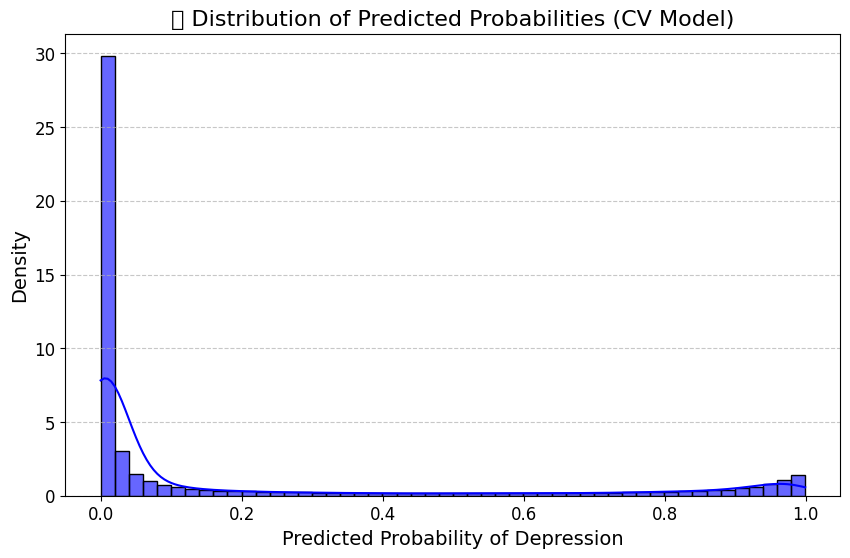

In [14]:

predicted_probabilities = best_model.predict_proba(test_transformed)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(predicted_probabilities, bins=50, kde=True, color='blue', stat='density', alpha=0.6)
plt.title('📊 Distribution of Predicted Probabilities (CV Model)', fontsize=16)
plt.xlabel('Predicted Probability of Depression', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 🎯 Hyperparameter Tuning vs. Default Parameters:
#### We explored Optuna in a separate notebook to tune the hyperparameters of the CatBoost model. Interestingly, in the Kaggle competition, the model's default parameters delivered slightly better prediction accuracy compared to the tuned ones. 🚀✨

# 10. 🔄 Stratified Cross-Validation 
### Using stratified cross-validation to evaluate the model's performance across splits.


In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

X = train_transformed.drop(columns=['Depression'])
y = train_transformed['Depression']

catboost_params = {
    'iterations': 1137,
    'learning_rate': 0.02586872544447489,
    'depth': 6,
    'l2_leaf_reg': 3.6094270939239776,
    'bagging_temperature': 9.536021883987623,
    'random_strength': 0.0860620821586228,
    'border_count': 207,
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 17,
    'verbose': 100
}

models = {
    'CatBoost': CatBoostClassifier(**catboost_params)
}

best_model = None
best_accuracy = 0

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n🔍 Performing Stratified Cross-Validation for {name}...")

    cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    avg_accuracy = np.mean(cv_scores)
    print(f'{name} Stratified Cross-Validation Accuracy: {avg_accuracy:.4f}')

    model.fit(X, y)

    y_pred = model.predict(X)
    print(f"\n📝 Classification Report for {name}:\n")
    print(classification_report(y, y_pred))

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_model = model

print(f'\n🎉 Best Model: {best_model.__class__.__name__} with average accuracy: {best_accuracy:.4f}')
predictions = best_model.predict(test_transformed)

output = pd.DataFrame({
    'id': test['id'],
    'Depression': predictions
})
output.to_csv('predictions_of_Statified_CV_BestModel.csv', index=False)
print("✅ Predictions for the best model saved in 'predictions_of_Statified_CV_BestModel.csv'.")




🔍 Performing Stratified Cross-Validation for CatBoost...
0:	learn: 0.6456929	total: 16.6ms	remaining: 18.9s
100:	learn: 0.1609143	total: 1.66s	remaining: 17s
200:	learn: 0.1514836	total: 3.29s	remaining: 15.3s
300:	learn: 0.1484468	total: 4.88s	remaining: 13.5s
400:	learn: 0.1466465	total: 6.5s	remaining: 11.9s
500:	learn: 0.1451146	total: 8.08s	remaining: 10.3s
600:	learn: 0.1438803	total: 9.63s	remaining: 8.59s
700:	learn: 0.1427857	total: 11.2s	remaining: 6.96s
800:	learn: 0.1416877	total: 12.8s	remaining: 5.35s
900:	learn: 0.1406762	total: 14.3s	remaining: 3.75s
1000:	learn: 0.1396797	total: 15.9s	remaining: 2.17s
1100:	learn: 0.1387702	total: 17.5s	remaining: 573ms
1136:	learn: 0.1384669	total: 18.1s	remaining: 0us
0:	learn: 0.6455767	total: 16.9ms	remaining: 19.2s
100:	learn: 0.1611567	total: 1.65s	remaining: 17s
200:	learn: 0.1516705	total: 3.29s	remaining: 15.3s
300:	learn: 0.1486328	total: 4.89s	remaining: 13.6s
400:	learn: 0.1469055	total: 6.51s	remaining: 11.9s
500:	learn: 

# 🏆 Conclusion and Submission

### 🏅 Best Model Summary
- Model: CatBoost with default hyperparameter
- Average Cross-Validation Accuracy: 0.9395
- Classification Report Metrics: 


📝 Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    115133
           1       0.88      0.85      0.86     25567

    accuracy                           0.95    140700
    macro avg      0.92      0.91      0.92    140700
    weighted avg   0.95      0.95      0.95    140700
